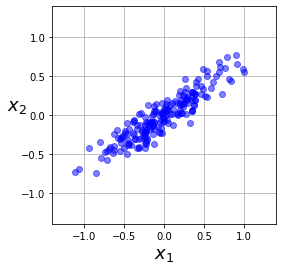

In [6]:
import numpy as np
import matplotlib.pyplot as plt

angle = np.pi/5
stretch = 5
m = 200

np.random.seed(0)
X = np.random.randn(m, 2)/10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

plt.figure(figsize=(4,4))
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

### Feature scaling

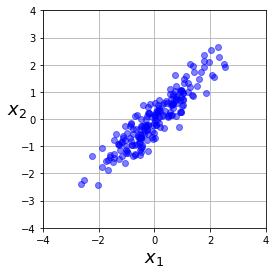

In [7]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

plt.figure(figsize=(4,4))
plt.plot(X_scaled[:, 0], X_scaled[:, 1], "bo", alpha=0.5)
plt.axis([-4, 4, -4, 4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)


### Covariance matrix of the original data

In [8]:
np.cov(X_scaled.T)

array([[1.00502513, 0.92261703],
       [0.92261703, 1.00502513]])

We can see that the two features are highly correlated with each other.

### Apply PCA

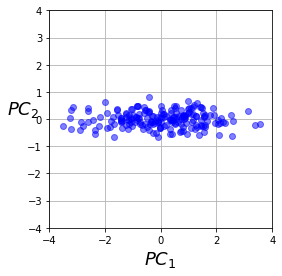

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(4,4))
plt.plot(X_pca[:, 0], X_pca[:, 1], "bo", alpha=0.5)
plt.axis([-4, 4, -4, 4])
plt.xlabel("$PC_1$", fontsize=18)
plt.ylabel("$PC_2$", fontsize=18, rotation=0)
plt.grid(True)

### Eigenvectors

In [8]:
pca.components_

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

### Visualizing Eigenvectors

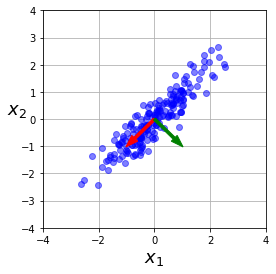

In [9]:
plt.figure(figsize=(4,4))
plt.plot(X_scaled[:, 0], X_scaled[:, 1], "bo", alpha=0.5)

# Plotting PC1
plt.arrow(0,0,pca.components_[0,0],pca.components_[0,1], width=0.1, color='r', zorder=10)

# Plotting PC2
plt.arrow(0,0,pca.components_[1,0],pca.components_[1,1], width=0.1, color='g', zorder=10)

plt.axis([-4, 4, -4, 4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

### Variance along the PCs

In [10]:
pca.explained_variance_

array([1.92764216, 0.08240809])

### Let's check the covariance matrix after PCA.

In [11]:
np.cov(X_pca.T)

array([[ 1.92764216e+00, -2.46064434e-17],
       [-2.46064434e-17,  8.24080922e-02]])

The two PCs are uncorelated.

### Variance ratio along the PCs (i.e., importance of the "new" features)

In [12]:
np.cov(X_pca.T)[0,0], np.cov(X_pca.T)[1,1]

(1.9276421591026294, 0.08240809215365455)

In [13]:
pca.explained_variance_ratio_

array([0.95900197, 0.04099803])

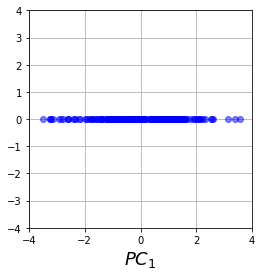

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(4,4))
plt.plot(X_pca[:, 0], np.zeros(X_pca.shape), "bo", alpha=0.5)

plt.axis([-4, 4, -4, 4])
plt.xlabel("$PC_1$", fontsize=18)
plt.grid(True)

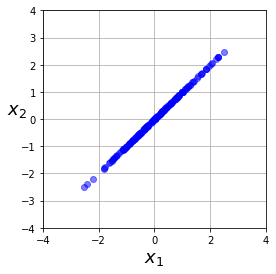

In [15]:
from sklearn.decomposition import PCA

X_inverse = pca.inverse_transform(X_pca)

plt.figure(figsize=(4,4))
plt.plot(X_inverse[:, 0], X_inverse[:, 1], "bo", alpha=0.5)

plt.axis([-4, 4, -4, 4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

### Dimensionality reduction is effective in removing highly correlated features.

### Let's play with the breast cancer dataset.
This example is adopted from: https://towardsdatascience.com/how-do-you-apply-pca-to-logistic-regression-to-remove-multicollinearity-10b7f8e89f9b

In [16]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [17]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

### Let's plot correlation coefficients.

<AxesSubplot:>

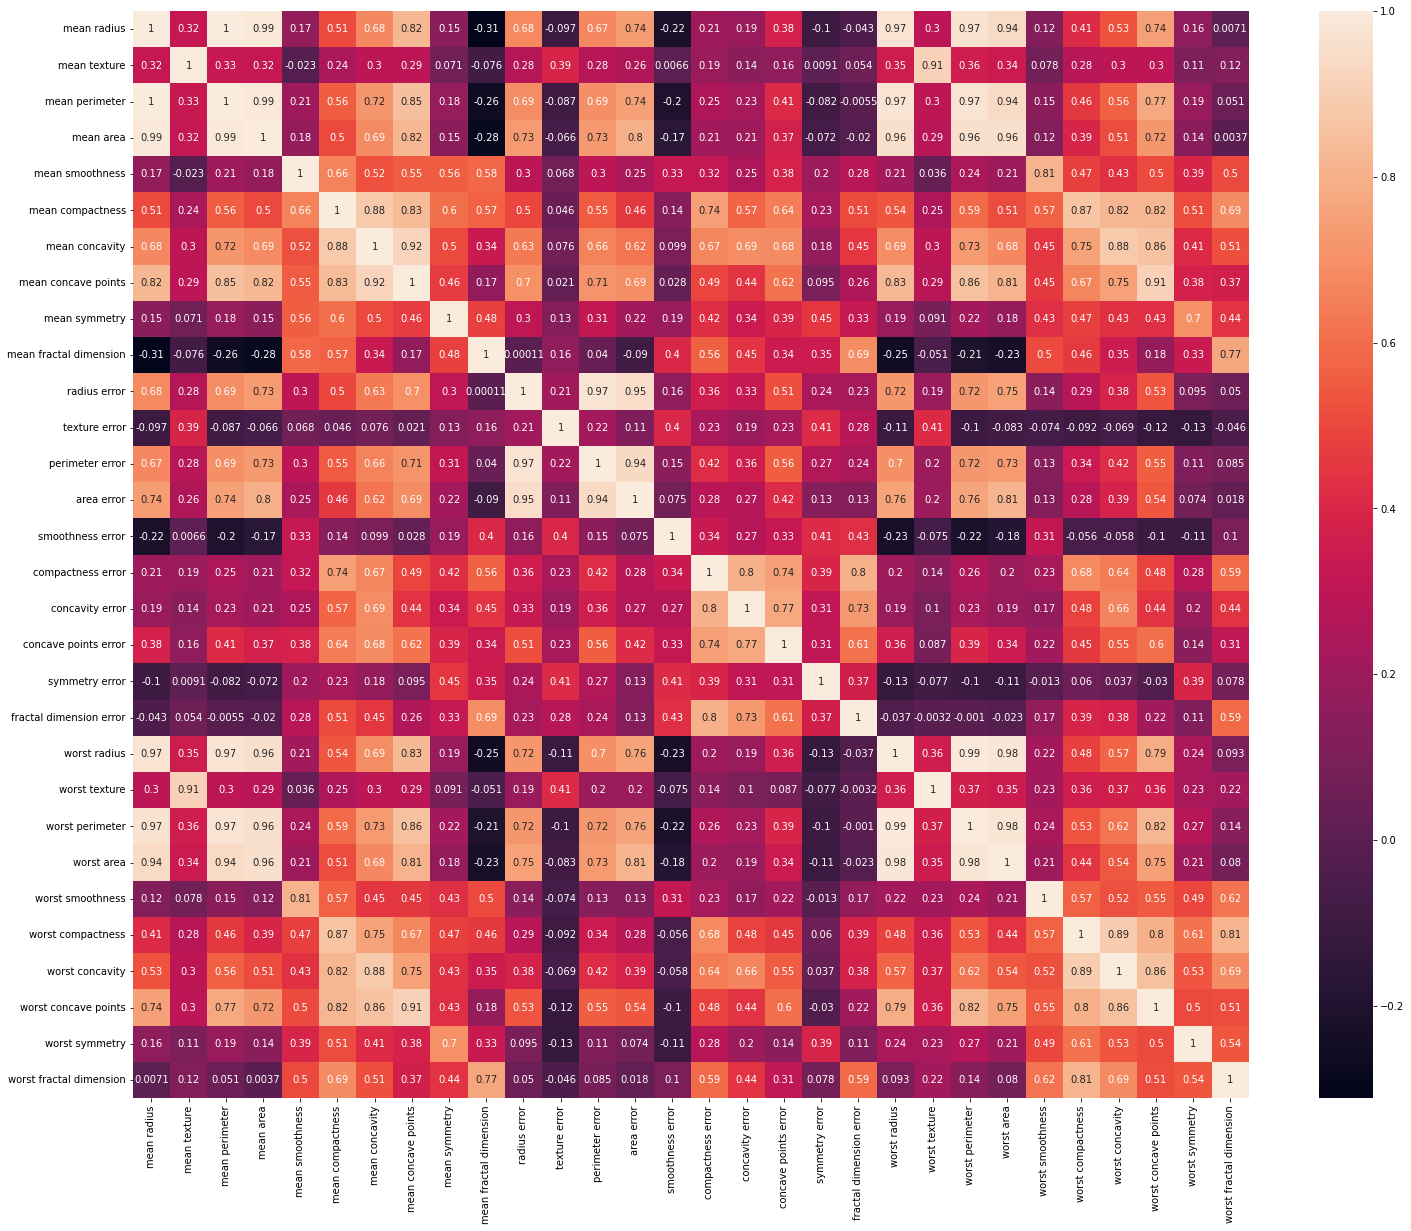

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), annot=True)

### Let's make a DT model and check the performance.

Test score: 0.90


Text(33.0, 0.5, 'True')

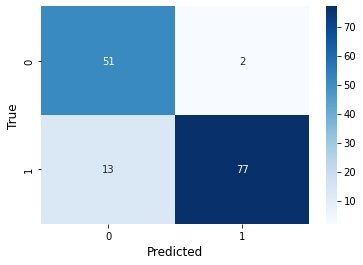

In [19]:
X = df
y = pd.Series(cancer.target)

# Make train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, random_state=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test) 

# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np

print("Test score: {:.2f}".format(model.score(X_test, y_test)))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

### Let's check how many components we want in PCA

Variances (Percentage):
[4.42720256e+01 1.89711820e+01 9.39316326e+00 6.60213492e+00
 5.49576849e+00 4.02452204e+00 2.25073371e+00 1.58872380e+00
 1.38964937e+00 1.16897819e+00 9.79718988e-01 8.70537901e-01
 8.04524987e-01 5.23365745e-01 3.13783217e-01 2.66209337e-01
 1.97996793e-01 1.75395945e-01 1.64925306e-01 1.03864675e-01
 9.99096464e-02 9.14646751e-02 8.11361259e-02 6.01833567e-02
 5.16042379e-02 2.72587995e-02 2.30015463e-02 5.29779290e-03
 2.49601032e-03 4.43482743e-04]

Cumulative Variance (Percentage):
[ 44.27202561  63.24320765  72.63637091  79.23850582  84.73427432
  88.75879636  91.00953007  92.59825387  93.98790324  95.15688143
  96.13660042  97.00713832  97.81166331  98.33502905  98.64881227
  98.91502161  99.1130184   99.28841435  99.45333965  99.55720433
  99.65711397  99.74857865  99.82971477  99.88989813  99.94150237
  99.96876117  99.99176271  99.99706051  99.99955652 100.        ]



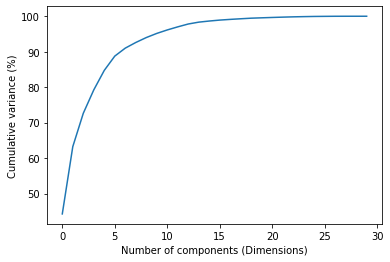

In [20]:
# feature scaling
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
from sklearn.decomposition import PCA

model = PCA()
model.fit(X_scaled)

# Get explained variances
print("Variances (Percentage):")
print(model.explained_variance_ratio_ * 100)
print()

print("Cumulative Variance (Percentage):")
print(np.cumsum(model.explained_variance_ratio_ * 100))
print()

# Make the scree plot
plt.plot(np.cumsum(model.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Cumulative variance (%)")

plt.savefig('explained_variance.png',dpi=300)

In [21]:
# feature scaling
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=7)

# This is the data in the "new" low-dimensional feature space.
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)
X_pca

0          1         2         3         4         5         6
0     9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411422  2.159382
1     2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028658  0.013345
2     5.733896  -1.075174 -0.551748  0.912082 -0.177086  0.541454 -0.668182
3     7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422  1.429909
4     3.935302  -1.948072  1.389767  2.940640  0.546747 -1.226496 -0.936196
..         ...        ...       ...       ...       ...       ...       ...
564   6.439315  -3.576817  2.459487  1.177314 -0.074824 -2.375192 -0.596141
565   3.793382  -3.584048  2.088476 -2.506028 -0.510723 -0.246709 -0.716335
566   1.256179  -1.902297  0.562731 -2.089227  1.809991 -0.534447 -0.192760
567  10.374794   1.672010 -1.877029 -2.356031 -0.033742  0.567934  0.223096
568  -5.475243  -0.670637  1.490443 -2.299157 -0.184703  1.617836  1.698963

[569 rows x 7 columns]

### Let's check correlation coefficients of the transformed data.

<AxesSubplot:>

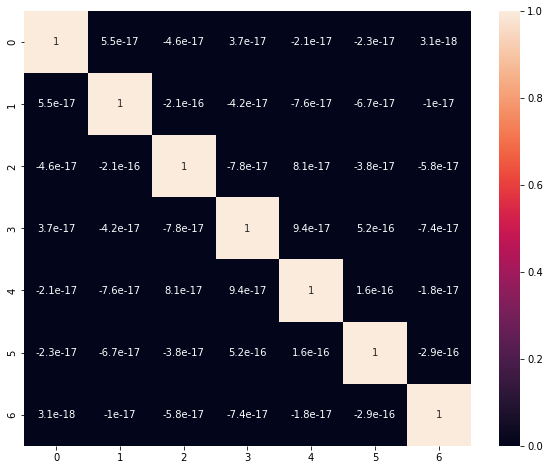

In [22]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_pca.corr(), annot=True)

### Another way to do this is to determine how much variance you'd like to keep.

In [23]:
# feature scaling
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

# Apply PCA, 90% variance
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)

# This is the data in the "new" low-dimensional feature space.
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)
X_pca

0          1         2         3         4         5         6
0     9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424  2.159370
1     2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656  0.013358
2     5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452 -0.668166
3     7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422  1.429911
4     3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495 -0.936213
..         ...        ...       ...       ...       ...       ...       ...
564   6.439315  -3.576817  2.459487  1.177314 -0.074824 -2.375193 -0.596130
565   3.793382  -3.584048  2.088476 -2.506028 -0.510723 -0.246710 -0.716326
566   1.256179  -1.902297  0.562731 -2.089227  1.809991 -0.534447 -0.192758
567  10.374794   1.672010 -1.877029 -2.356031 -0.033742  0.567936  0.223082
568  -5.475243  -0.670637  1.490443 -2.299157 -0.184703  1.617837  1.698952

[569 rows x 7 columns]

### Fractional variance and the number of components to achieve that fractional variance.

In [24]:
pca.n_components, pca.n_components_

(0.9, 7)

### Let's make a DT model using the "PCA-ed" data.

Test score: 0.90

Test confusion_matrix


Text(33.0, 0.5, 'True')

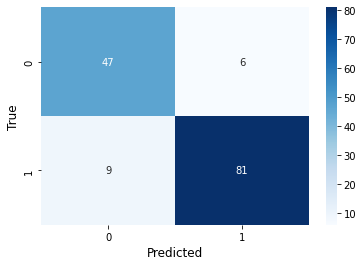

In [25]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, random_state=0)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, random_state=0)

# Train the model
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca) # Predictions

# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Test score: {:.2f}".format(model.score(X_test_pca, y_test)))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

We got the same accuracy of 0.9 in the lower dimensional space (7 vs. 30), which is great!

### Let's move to even higher-dimesional space.  We will use the MNIST dataset.

In [30]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [31]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X = X[::10]
y = y[::10]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [32]:
X_train.shape

(5250, 784)

### TODO: Make a kNN model using k=10 without PCA. Print out test score so that we can compare the performance.

In [76]:
from sklearn.neighbors import KNeighborsClassifier                               
import time

X_train = StandardScaler().fit(X_train).transform(X_train)
X_test = StandardScaler().fit(X_train).transform(X_test)

tstart = time.time()

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

print("Test score: {:.2f}".format(model.score(X_test, y_test)))
print("Elapsed Time: {:.2f}s".format(time.time() - tstart))

Test score: 0.80
Elapsed Time: 0.31s


### TODO: Now apply PCA before we make a kNN model while keeping 90% variance.

In [77]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

tstart = time.time()

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train_pca, y_train)

print("Test score: {:.2f}".format(model.score(X_test_pca, y_test)))
print("Elapsed Time: {:.2f}s".format(time.time() - tstart))

Test score: 0.81
Elapsed Time: 0.25s


### Q: How many components did you end up keeping and how does that compare with the original dimension (i.e., 784)?

In [78]:
pca.n_components_

180

### TODO: Compare some of the original images and their inverse transformed images from the data that contain only 90% of the original information.

Text(0.5, 1.0, '90% of Explained Variance')

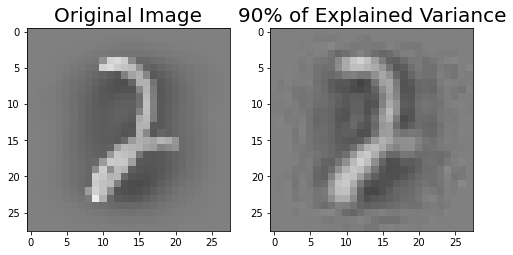

In [79]:
X_inverse = pca.inverse_transform(X_train_pca)

plt.figure(figsize=(8,4))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(X_train[0].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(-3, 3))
plt.title('Original Image', fontsize = 20)

plt.subplot(1, 2, 2)
plt.imshow(X_inverse[0].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(-3, 3))
plt.title('90% of Explained Variance', fontsize = 20)

### Now, let's plot some of the Eigenvectors.

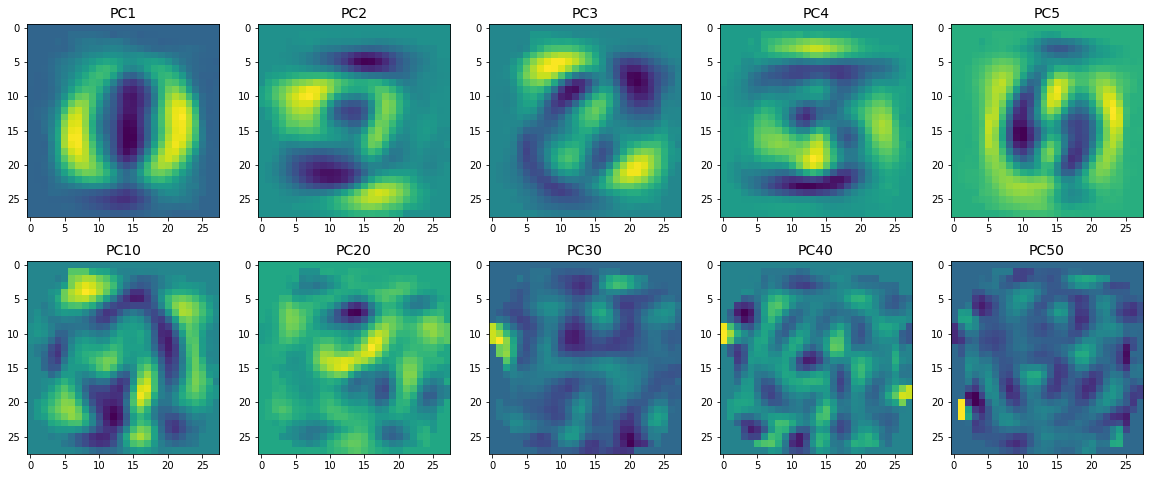

In [80]:
plt.figure(figsize=(20,8));

plt.subplot(2, 5, 1)
plt.imshow(pca.components_[0].reshape(28,28))
plt.title('PC1', fontsize = 14);

plt.subplot(2, 5, 2)
plt.imshow(pca.components_[1].reshape(28,28))
plt.title('PC2', fontsize = 14);

plt.subplot(2, 5, 3)
plt.imshow(pca.components_[2].reshape(28,28))
plt.title('PC3', fontsize = 14);

plt.subplot(2, 5, 4)
plt.imshow(pca.components_[3].reshape(28,28))
plt.title('PC4', fontsize = 14);

plt.subplot(2, 5, 5)
plt.imshow(pca.components_[4].reshape(28,28))
plt.title('PC5', fontsize = 14);

plt.subplot(2, 5, 6)
plt.imshow(pca.components_[9].reshape(28,28))
plt.title('PC10', fontsize = 14);

plt.subplot(2, 5, 7)
plt.imshow(pca.components_[19].reshape(28,28))
plt.title('PC20', fontsize = 14);

plt.subplot(2, 5, 8)
plt.imshow(pca.components_[29].reshape(28,28))
plt.title('PC30', fontsize = 14);

plt.subplot(2, 5, 9)
plt.imshow(pca.components_[39].reshape(28,28))
plt.title('PC40', fontsize = 14);

plt.subplot(2, 5, 10)
plt.imshow(pca.components_[49].reshape(28,28))
plt.title('PC50', fontsize = 14);


### Q: What does the figure tell us?

### PCA for Galaxy Zoo data

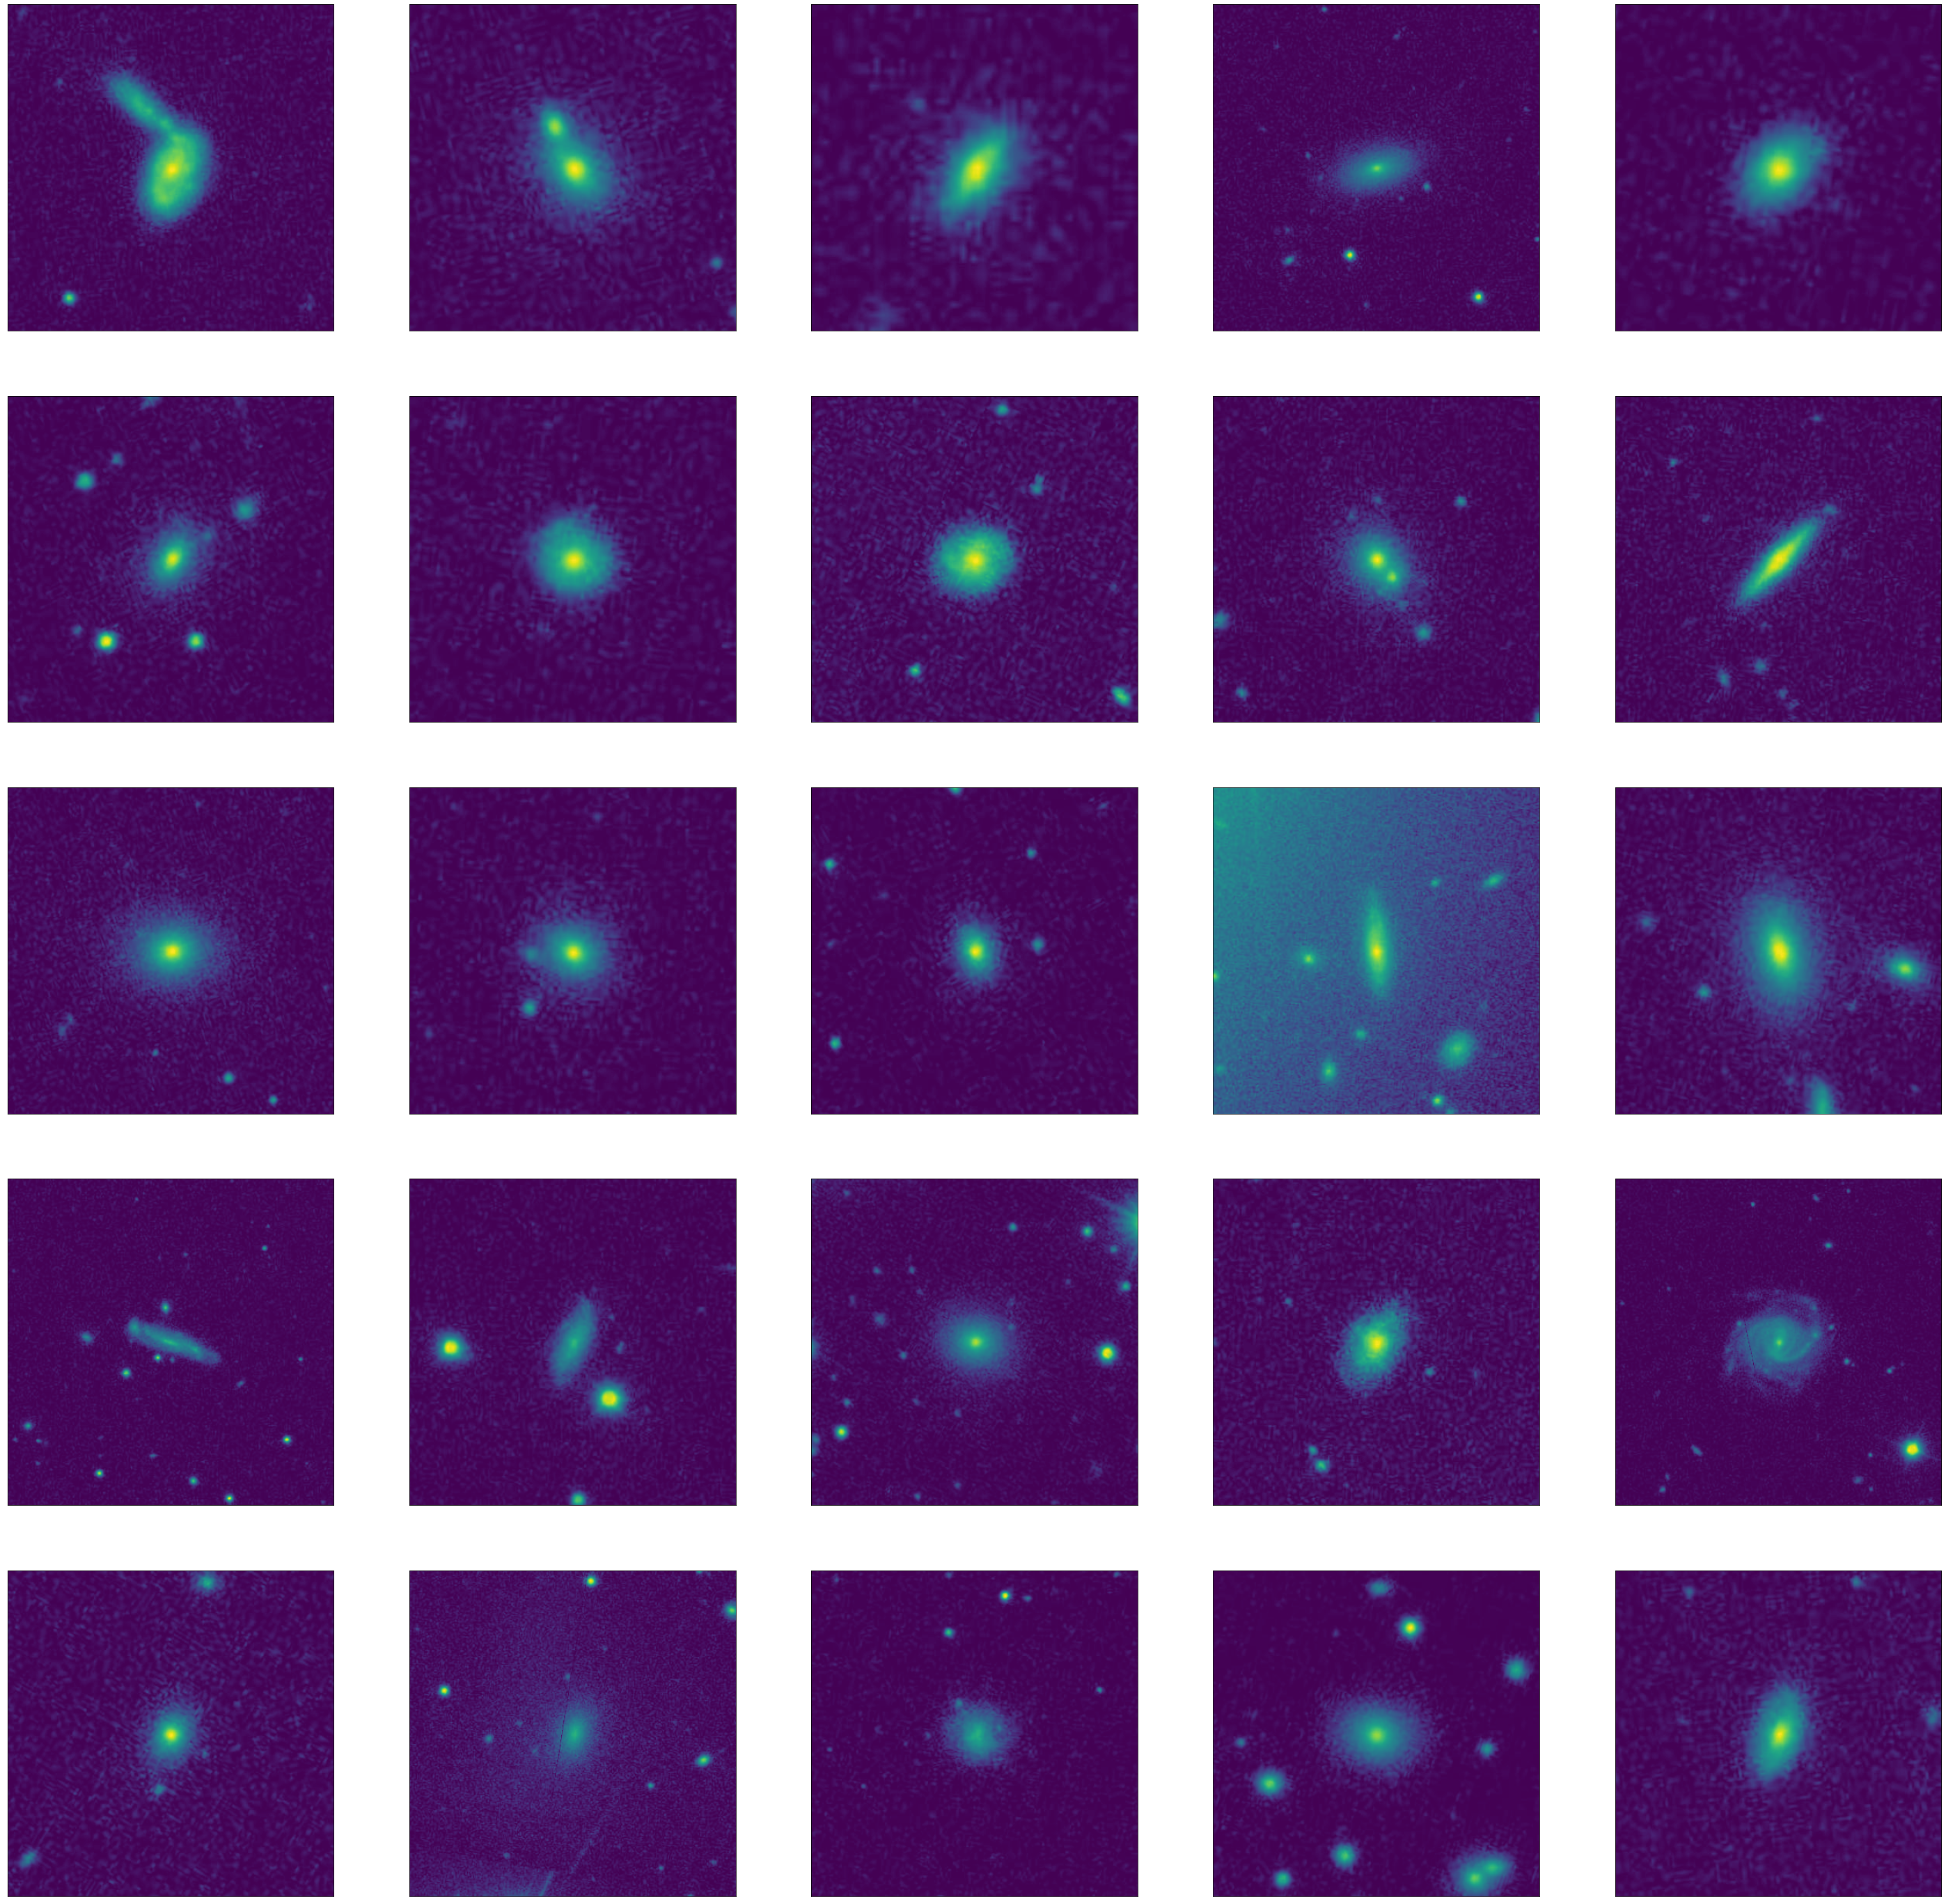

In [23]:
# If you need to install skimage, see https://scikit-image.org/docs/stable/install.html

import glob
import skimage
from skimage.transform import resize, rescale
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

path = './galaxyzoo/'

images = []

fig, axes = plt.subplots(ncols= 5, nrows = 5, figsize=(50,50))

ax = axes.ravel()

for i, file in enumerate(glob.glob(path+"*")):
    img = skimage.io.imread(file)
    img = img.mean(axis=2)
    if i < 25:
        ax[i].imshow(img)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
    img_resized = resize(img,(100,100))
    length = np.prod(img_resized.shape)
    img_resized = np.reshape(img_resized,length)
    images.append(img_resized)
    
images = np.vstack(images)

images /= 255 # normalize such that each pixel is in between 0 and 1

In [33]:
images.shape

(133, 10000)

### TODO: Compute mean squared error when you keep 80%, 90%, and 95% of the variance. How does the error vary?

In [25]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# 80%
pca = PCA(n_components=0.8)
images_pca = pca.fit_transform(images)
images_inversed = pca.inverse_transform(images_pca)
print("Number of PCs: {:}".format(pca.n_components_))
print("MSE: {:.8f}".format(mean_squared_error(images, images_inversed)))

# 90%
pca = PCA(n_components=0.9)
images_pca = pca.fit_transform(images)
images_inversed = pca.inverse_transform(images_pca)
print("Number of PCs: {:}".format(pca.n_components_))
print("MSE: {:.8f}".format(mean_squared_error(images, images_inversed)))

# 95%
pca = PCA(n_components=0.95)
images_pca = pca.fit_transform(images)
images_inversed = pca.inverse_transform(images_pca)
print("Number of PCs: {:}".format(pca.n_components_))
print("MSE: {:.8f}".format(mean_squared_error(images, images_inversed)))


Number of PCs: 29
MSE: 0.00045712
Number of PCs: 52
MSE: 0.00023326
Number of PCs: 77
MSE: 0.00011597


### TODO: Keep 90% of the variance and apply PCA.

In [27]:
pca = PCA(n_components=0.9)
images_pca = pca.fit_transform(images)

### TODO: Inverse transform the PCA-ed images. Make figures showing (1) original image, (2) inverse transformed image, and (3) the difference between the two.

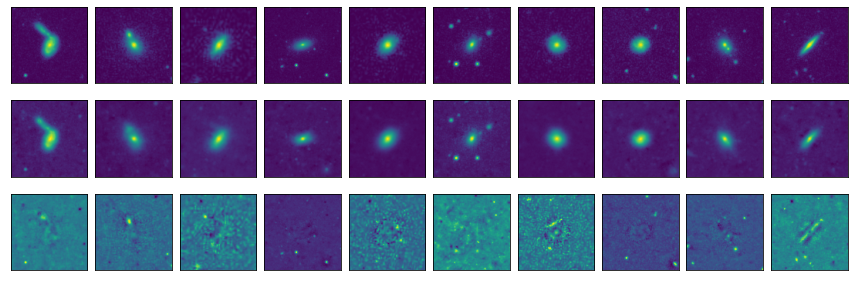

In [28]:
images_inversed = pca.inverse_transform(images_pca)

# Plot the results
fig, ax = plt.subplots(3, 10, figsize=(15, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(images[i].reshape(100, 100))
    ax[1, i].imshow(images_inversed[i].reshape(100, 100))
    ax[2, i].imshow((images[i]-images_inversed[i]).reshape(100, 100))